# Predicting Car Prices using K-Nearest Neighbours

In this project we train a k-nearest neighbours algorithm to predict the price of cars given some of their attributes. 
Our primary aim is to illustrate on this example the workflow to set-up, train, and test such a model using Scikit-Learn on real-world data.

## The dataset

The dataset we willl use, `imports-85.data`, was downloaded from [the UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/automobile) and created by Jeffrey C. Schlimmer by combining data from the 1985 Ward's Automotive Yearbook, a Personal Auto Manuals from an Insurance Services Office at 160 Water Street, New York, NY 10038, and an Insurance Collision Report from Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037. We quote its description from [the UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/automobile):

“This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.”

The columns are, quoting from the same webpage and in the format “Attribute: Attribute Range”: 

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

We will be primarily interested in the numerical columns which may contribute to the price, *i.e.*, `symboling`, `normalized-losses`, `num-of-doors`, `wheel-base`, `length`, `width`, `height`, `curb-weight`, `num-of-cylinders`, `engine-size`, `bore`, `stroke`, `compression-ratio`, `horsepower`, `peak-rpm`, `city-mpg`, and `highway-mpg`.

Let us load the Pandas module and the dataset:

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500) # to display all columns

column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('../Data/imports-85.data', header=None)
cars.columns = column_names 

Let us display the first few rows:

In [2]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Let us look at the types of each column:

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

There is no apparent missing value. 
However, some columns contain strings of digits (and, for some, a point) instead of numbers, with unknown values denoted by ‘?’. 
Let us replace them with floats, replacing the question mark by `NaN`.

In [4]:
columns_to_convert = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for column in columns_to_convert:
    cars[column] = cars[column].replace('?', 'NaN').astype(float)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Two columns contain numbers written in letters:

In [5]:
print(cars['num-of-doors'].value_counts())
print()
print(cars['num-of-cylinders'].value_counts())

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64


Let us convert them to floats:

In [6]:
num_letters = {'?':'NaN', 'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8, 'nine':9, 'ten':10, 'eleven':11, 'twelve':12}
columns_to_convert_2 = ['num-of-doors', 'num-of-cylinders']
for column in columns_to_convert_2:
    cars[column] = cars[column].replace(num_letters).astype(float)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6.0,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4.0,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5.0,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Let us now look for missing values:

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    float64
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    float64
 16  engine-size        205 non

The column `normalized-losses` has 41 missing values. 
Other columns have a few of them. 
The total number of missing values seems too large to try and guess them without risking biasing the data. 
On the other hand, the `normalized-loss` column seems a possibly important factor, so we don't want to drop it.
Let us thus delete the rows with missing values.

In [8]:
cars = cars.dropna()
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    float64
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    float64
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    float64
 16  engine-size        159 non

Let us finally normalize the numerical columns to have values between 0 and 1:

In [9]:
num_cols = ['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
for col in num_cols:
    cars[col] = (cars[col] - cars[col].min()) / (cars[col].max() - cars[col].min())
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,0.8,0.518325,audi,gas,std,1.0,sedan,fwd,front,0.455172,0.577236,0.517544,0.471154,0.329325,ohc,0.2,0.243655,mpfi,0.464286,0.633333,0.18750,0.355263,0.551020,0.264706,0.333333,0.295010
4,0.8,0.518325,audi,gas,std,1.0,sedan,4wd,front,0.441379,0.577236,0.535088,0.471154,0.518231,ohc,0.4,0.380711,mpfi,0.464286,0.633333,0.06250,0.440789,0.551020,0.088235,0.111111,0.411918
6,0.6,0.486911,audi,gas,std,1.0,sedan,fwd,front,0.662069,0.839024,0.973684,0.605769,0.525989,ohc,0.4,0.380711,mpfi,0.464286,0.633333,0.09375,0.407895,0.551020,0.117647,0.194444,0.420603
8,0.6,0.486911,audi,gas,turbo,1.0,sedan,fwd,front,0.662069,0.839024,0.973684,0.625000,0.619860,ohc,0.4,0.355330,mpfi,0.421429,0.633333,0.08125,0.605263,0.551020,0.058824,0.055556,0.626528
10,0.8,0.664921,bmw,gas,std,0.0,sedan,rwd,front,0.503448,0.580488,0.394737,0.471154,0.351823,ohc,0.2,0.238579,mpfi,0.685714,0.347619,0.11250,0.348684,0.673469,0.235294,0.305556,0.377848


## Univariate k-nearest neighbours model

As a first step, let us perform a very simple k-nearest neighbours analysis using only one variable. 
We first import the numpy module and the elements we will need from the scikit-learn module, as well as the pyplot module from matplotlib:

In [10]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

The function `knn_train_test_uni` below takes three required arguments: a training column name, a target column name, and a dataframe. 
It also takes three optional arguments: the number of nearest neighbours used, the fraction of test data, and a seed for the random permutation (the permutation is pseudo-random if the seed is `None`). 
It divides the data into a training set and a test set, fits a univariate k-nearest neighbours model on the training data, tests it on the test data, and returns the root mean squared error.

In [11]:
def knn_train_test_uni(train_col, target_col, df, k = 5, frac_test = 0.25, random_state= None):
    '''
    trains a univariate k-nearest neighbour model and returns the rms error
    
    train_col: string
    target_col: string
    df: dataframe
    k: positive integer
    frac_test: positive float
    random_state: non-negative integer or None
    '''
    
    ## split the dataset into a training set and a test set
    
    # numbers of train and test rows
    n_rows = df.shape[0]
    n_test = int(frac_test * n_rows)
    n_train = n_rows - n_test
    
    # random permutation of the dataset
    df_permuted = df[[train_col, target_col]].iloc[np.random.RandomState(random_state).permutation(range(n_rows))]
    
    # normalize the dataset
    df_permuted = (df_permuted - df_permuted.mean()) / df_permuted.std()
    
    # train dataset
    df_train = df_permuted.iloc[:n_train]
    
    # test dataset
    df_test = df_permuted.iloc[n_train:]
    
    ## build the model
    
    # instanciate the KNeighborsRegressor class
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # fit the model on the train data
    knn.fit(df_train[[train_col]], df_train[target_col])
    
    ## compute the error on the test data
    
    # prediction for the test data
    predictions = knn.predict(df_test[[train_col]])
    
    # rms error
    rmse = np.sqrt(mean_squared_error(predictions, df_test[target_col]))
    
    return rmse

Let us now test it with `price` as target on all other columns, for values of k ranging from 1 to 9:

In [12]:
values_k = range(1,9)
target_col = 'price'

for train_col in num_cols:
    for k in values_k:
        print('Feature: {}, k: {}, rmse: {}'.format(train_col, k, knn_train_test_uni(train_col, target_col, cars, k)))

Feature: symboling, k: 1, rmse: 1.4974837126193088
Feature: symboling, k: 2, rmse: 0.9846567000973578
Feature: symboling, k: 3, rmse: 1.3097285619052839
Feature: symboling, k: 4, rmse: 0.9470778293198253
Feature: symboling, k: 5, rmse: 0.9403829597961121
Feature: symboling, k: 6, rmse: 0.8196398516258578
Feature: symboling, k: 7, rmse: 0.8267377435066144
Feature: symboling, k: 8, rmse: 0.8192538381909333
Feature: normalized-losses, k: 1, rmse: 0.577477933978937
Feature: normalized-losses, k: 2, rmse: 0.5194572782086905
Feature: normalized-losses, k: 3, rmse: 0.8506614037615254
Feature: normalized-losses, k: 4, rmse: 1.026946651393517
Feature: normalized-losses, k: 5, rmse: 0.7332291114876253
Feature: normalized-losses, k: 6, rmse: 1.0672794633546419
Feature: normalized-losses, k: 7, rmse: 0.8763774492966887
Feature: normalized-losses, k: 8, rmse: 0.8969197885318928
Feature: num-of-doors, k: 1, rmse: 1.5244839327503434
Feature: num-of-doors, k: 2, rmse: 0.9535103946707182
Feature: num-o

Let us make a plot to vsualize the results. 
Running the above cell shows a lot of variability. 
To get clearer results, we perform the calculations a number `n_repeat` of times and average the error.

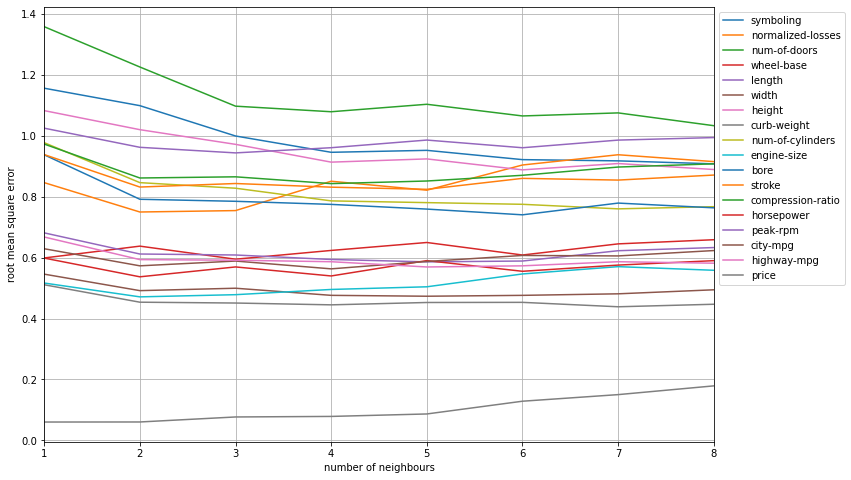

In [13]:
n_repeat = 100

res = []
for train_col in num_cols:
    res.append([])
    for k in values_k:
        res[-1].append(np.mean([knn_train_test_uni(train_col, target_col, cars, k) for i in range(n_repeat)]))
        
plt.figure(figsize=(12,8))
for i in range(len(num_cols)): 
    plt.plot(values_k, res[i], label = num_cols[i])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlim(min(values_k), max(values_k))
plt.xlabel('number of neighbours')
plt.ylabel('root mean square error')
plt.grid()
plt.show()

The error shows relatively little variation with k. 
Discarding the line for `price`, it is generally lowest when choosing the `curb_weight` column as feature.

## Multivariate k-nearest neighbours model

We now want to use several different features. 
The function `knn_train_test` below works the same way as `knn_train_test_uni` but takes a list of strings `train_cols` as first input, which is the list of columns to be used.

In [14]:
def knn_train_test(train_cols, target_col, df, k = 5, frac_test = 0.25, random_state= None):
    '''
    trains a univariate k-nearest neighbour model and returns the rms error
    
    train_cols: list of strings
    target_col: string
    df: dataframe
    k: positive integer
    frac_test: positive float
    random_state: non-negative integer or None
    '''
    
    ## split the dataset into a training set and a test set
    
    # numbers of train and test rows
    n_rows = df.shape[0]
    n_test = int(frac_test * n_rows)
    n_train = n_rows - n_test
    
    # random permutation of the dataset
    df_permuted = df[train_cols+[target_col]].iloc[np.random.RandomState(random_state).permutation(range(n_rows))]
    
    # normalize the dataset
    df_permuted = (df_permuted - df_permuted.mean()) / df_permuted.std()
    
    # train dataset
    df_train = df_permuted.iloc[:n_train]
    
    # test dataset
    df_test = df_permuted.iloc[n_train:]
    
    ## build the model
    
    # instanciate the KNeighborsRegressor class
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # fit the model on the train data
    knn.fit(df_train[train_cols], df_train[target_col])
    
    ## compute the error on the test data
    
    # prediction for the test data
    predictions = knn.predict(df_test[train_cols])
    
    # rms error
    rmse = np.sqrt(mean_squared_error(predictions, df_test[target_col]))
    
    return rmse

Let us plot the evolution of the error with the number of neighbours when using between 1 and 5 features, chosen as those which gave the best results in the previous section.

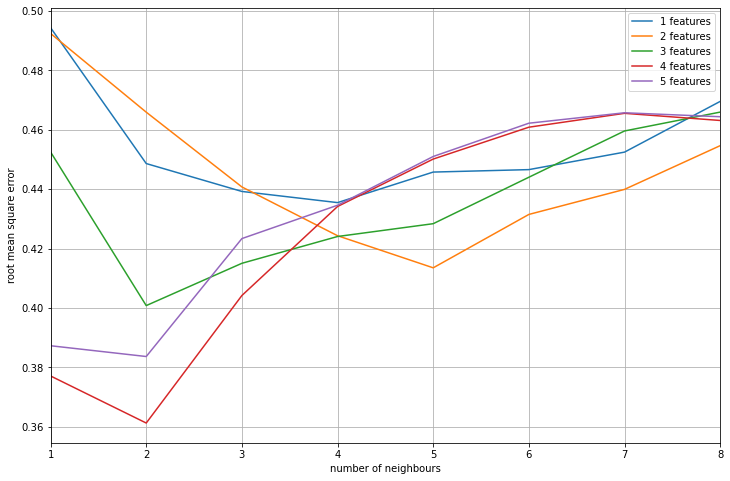

In [15]:
n_repeat = 100

values_k = range(1,9)
target_col = 'price'
train_cols = ['curb-weight', 'city-mpg', 'peak-rpm', 'engine-size', 'horsepower']

res = []
for i in range(len(train_cols)):
    res.append([])
    for k in values_k:
        res[-1].append(np.mean([knn_train_test(train_cols[:(i+1)], target_col, cars, k) for j in range(n_repeat)]))
        
plt.figure(figsize=(12,8))
for i in range(len(train_cols)): 
    plt.plot(values_k, res[i], label = str(i+1) + ' features')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlim(min(values_k), max(values_k))
plt.xlabel('number of neighbours')
plt.ylabel('root mean square error')
plt.grid()
plt.show()

The best-performing models seem to be those with 4 features and 3 neighbours or less, with a rms error below 40%.

## Implementing cross-validation

We now add a cross-validation step to tune the number of neighbours. 
To this end, we first import the required elements from scikit-learn:

In [16]:
from sklearn.model_selection import cross_val_score, KFold

The function `knn_train_test_CV` choses the best balue for the number of neighbours using cross-validation.

In [23]:
def knn_train_test_CV(train_cols, target_col, df, ks = range(1,10), frac_test = 0.25, n_fold = 5, random_state = None):
    '''
    trains a univariate k-nearest neighbour model and returns the rms error
    
    train_cols: list of strings
    target_col: string
    df: dataframe
    ks: list of positive integers
    frac_test: positive float
    n_fold: positive integer 
    random_state: non-negative integer or None
    '''
    
    ## split the dataset into a training set and a test set
    
    # numbers of train and test rows
    n_rows = df.shape[0]
    n_test = int(frac_test * n_rows)
    n_train = n_rows - n_test
    
    # random permutation of the dataset
    df_permuted = df[train_cols+[target_col]].iloc[np.random.RandomState(random_state).permutation(range(n_rows))]
    
    # normalize the dataset
    df_permuted = (df_permuted - df_permuted.mean()) / df_permuted.std()
    
    # train dataset
    df_train = df_permuted.iloc[:n_train]
    
    # test dataset
    df_test = df_permuted.iloc[n_train:]
    
    ## choosing the best value of k through cross-validation
    
    kf = KFold(n_fold, shuffle=True, random_state=random_state)
    
    best_k = ks[0]
    knn = KNeighborsRegressor(n_neighbors = ks[0])
    mses = cross_val_score(knn, df_train[train_cols], df_train[target_col], scoring='neg_mean_squared_error', cv=kf)
    best_mse = np.mean(mses)
    
    for k in ks[1:]:
        knn = KNeighborsRegressor(n_neighbors = k)
        mses = cross_val_score(knn, df_train[train_cols], df_train[target_col], scoring='neg_mean_squared_error', cv=kf)
        mean_mses = np.mean(mses)
        if mean_mses > best_mse:
            best_k = k
            best_mse = mean_mses
    
    ## build the model with the best value of k

    # instanciate the KNeighborsRegressor class
    knn = KNeighborsRegressor(n_neighbors = best_k)
    
    # fit the model on the train data
    knn.fit(df_train[train_cols], df_train[target_col])
    
    ## compute the error on the test data
    
    # prediction for the test data
    predictions = knn.predict(df_test[train_cols])
    
    # rms error
    rmse = np.sqrt(mean_squared_error(predictions, df_test[target_col]))
    
    return rmse

Test with 4 features:

In [25]:
n_repeat= 100

res = []
for i in range(n_repeat):
    res.append(knn_train_test_CV(['curb-weight', 'city-mpg', 'peak-rpm', 'engine-size'], 'price', cars))

sum(res) / n_repeat

0.38046139126250433

This model rhas an rms error slightly below 0.4 on average.